In [ ]:
# !pip install -U "tensorflow-text==2.13.*"

In [ ]:
# !pip install "tf-models-official==2.13.*"

In [ ]:
# !pip install numba

In [ ]:
# !pip install tf-models-official

In [ ]:
# !pip install transformers

In [ ]:
# General Imports
import pandas as pd
import numpy as np
import re
import string
import nltk

# Preprocessing Imports
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Sklearn Imports for Classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, roc_curve, auc,roc_auc_score)

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Transformers Imports
import tensorflow as tf
from transformers import TFBertForSequenceClassification,BertTokenizer,TFBertModel
from tensorflow.keras.utils import plot_model
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

#Import Topic Detection Libraries
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# NLTK Data Download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

#Import Warnings
import warnings; warnings.filterwarnings("ignore")

# Mount Google Drive
from google.colab import drive

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#File Path
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/amazon_reviews.txt'

Mounted at /content/drive


### Task 1: Preprocessing the Textual Data

In [ ]:
# Load the dataset
df = pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'label'])

In [ ]:
df

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [ ]:
df['label'].value_counts()

,count
label,
0,500
1,500


Define Preprocessing Functions

In [ ]:
# 1. Removing Punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# 2. Removing Numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# 3. Removing Stop Words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

# 4. Changing Text to Lower Case
def to_lowercase(text):
    return text.lower()

# 5. Lemmatizing
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# 6. Stemming
stemmer = PorterStemmer()
def stem_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in words])

# 6. Additional Preprocessing: Removing Special Characters and Extra Whitespace
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()


Apply Preprocessing to the Data

In [ ]:
# Create a new column for the cleaned reviews
df['cleaned_review'] = df['review']

# Apply preprocessing steps
df['cleaned_review'] = df['cleaned_review'].apply(remove_punctuation)
df['cleaned_review'] = df['cleaned_review'].apply(remove_numbers)
df['cleaned_review'] = df['cleaned_review'].apply(to_lowercase)
df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)
df['cleaned_review'] = df['cleaned_review'].apply(lemmatize_text)
df['cleaned_review'] = df['cleaned_review'].apply(stem_text)
df['cleaned_review'] = df['cleaned_review'].apply(remove_special_characters)


In [ ]:
# Set pandas option to display full column width
pd.set_option('display.max_colwidth', None)

In [ ]:
for i in range(3):
    review = df.loc[i, 'review']
    print(f"\nReview {i+1}:")
    print(f"Original review:\n{review}\n")

    # Apply preprocessing steps one by one
    step1 = remove_punctuation(review)
    print(f"After remove_punctuation:\n{step1}\n")

    step2 = remove_numbers(step1)
    print(f"After remove_numbers:\n{step2}\n")

    step3 = to_lowercase(step2)
    print(f"After to_lowercase:\n{step3}\n")

    step4 = remove_stopwords(step3)
    print(f"After remove_stopwords:\n{step4}\n")

    step5 = lemmatize_text(step4)
    print(f"After lemmatize_text:\n{step5}\n")

    step6 = stem_text(step5)
    print(f"After stem_text:\n{step6}\n")

    step7 = remove_special_characters(step6)
    print(f"After remove_special_characters:\n{step7}\n")


Review 1:
Original review:
So there is no way for me to plug it in here in the US unless I go by a converter.

After remove_punctuation:
So there is no way for me to plug it in here in the US unless I go by a converter

After remove_numbers:
So there is no way for me to plug it in here in the US unless I go by a converter

After to_lowercase:
so there is no way for me to plug it in here in the us unless i go by a converter

After remove_stopwords:
way plug us unless go converter

After lemmatize_text:
way plug u unless go converter

After stem_text:
way plug u unless go convert

After remove_special_characters:
way plug u unless go convert


Review 2:
Original review:
Good case, Excellent value.

After remove_punctuation:
Good case Excellent value

After remove_numbers:
Good case Excellent value

After to_lowercase:
good case excellent value

After remove_stopwords:
good case excellent value

After lemmatize_text:
good case excellent value

After stem_text:
good case excel valu

After

### Task 2: Classification Using Bag-of-Words & TF-IDF Representations

Split the Data

In [ ]:
X = df['cleaned_review']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Define Function to Train and Evaluate Models

In [ ]:
def train_and_collect_metrics(model, X_train_vec, X_test_vec, y_train, y_test, model_name="Model"):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Check if the model has predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_vec)[:, 1]
    elif hasattr(model, "decision_function"):
        # For SVC with probability=False, decision_function returns distances to the hyperplane
        y_pred_proba = model.decision_function(X_test_vec)
    else:
        y_pred_proba = None

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return y_test, y_pred, y_pred_proba


Initialize Lists to Store Metrics

In [ ]:
# Lists for storing metrics
model_names_bow = []
y_tests_bow = []
y_preds_bow = []
y_pred_probas_bow = []

model_names_tfidf = []
y_tests_tfidf = []
y_preds_tfidf = []
y_pred_probas_tfidf = []


#### Bag-of-Words Representation

Create Bag-of-Words Features

In [ ]:
# Initialize CountVectorizer
bow_vectorizer = CountVectorizer()

# Fit and transform training data
X_train_bow = bow_vectorizer.fit_transform(X_train)

# Transform testing data
X_test_bow = bow_vectorizer.transform(X_test)


Train and Evaluate Models with Bag-of-Words

1. Logistic Regression

In [ ]:
print("Logistic Regression with Bag-of-Words")
lr_model = LogisticRegression(max_iter=1000)
y_test_lr, y_pred_lr, y_pred_proba_lr = train_and_collect_metrics(
    lr_model, X_train_bow, X_test_bow, y_train, y_test, model_name="Logistic Regression (BoW)")

# Store metrics
model_names_bow.append("Logistic Regression")
y_tests_bow.append(y_test_lr)
y_preds_bow.append(y_pred_lr)
y_pred_probas_bow.append(y_pred_proba_lr)


Logistic Regression with Bag-of-Words

Logistic Regression (BoW) Accuracy: 0.7800
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        93
           1       0.83      0.74      0.78       107

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



2. Support Vector Machine

In [ ]:
print("Support Vector Machine with Bag-of-Words")
svm_model = SVC(probability=True)
y_test_svm, y_pred_svm, y_pred_proba_svm = train_and_collect_metrics(
    svm_model, X_train_bow, X_test_bow, y_train, y_test, model_name="SVM (BoW)")

# Store metrics
model_names_bow.append("SVM")
y_tests_bow.append(y_test_svm)
y_preds_bow.append(y_pred_svm)
y_pred_probas_bow.append(y_pred_proba_svm)


Support Vector Machine with Bag-of-Words

SVM (BoW) Accuracy: 0.7900
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        93
           1       0.86      0.73      0.79       107

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



3. Multinomial Naïve Bayes

In [ ]:
print("Multinomial Naïve Bayes with Bag-of-Words")
nb_model = MultinomialNB()
y_test_nb, y_pred_nb, y_pred_proba_nb = train_and_collect_metrics(
    nb_model, X_train_bow, X_test_bow, y_train, y_test, model_name="Naïve Bayes (BoW)")

# Store metrics
model_names_bow.append("Naïve Bayes")
y_tests_bow.append(y_test_nb)
y_preds_bow.append(y_pred_nb)
y_pred_probas_bow.append(y_pred_proba_nb)


Multinomial Naïve Bayes with Bag-of-Words

Naïve Bayes (BoW) Accuracy: 0.8100
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        93
           1       0.82      0.83      0.82       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



#### TF-IDF Representation

Create TF-IDF Features

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Train and Evaluate Models with TF-IDF

1. Logistic Regression

In [ ]:
print("Logistic Regression with TF-IDF")
y_test_lr_tfidf, y_pred_lr_tfidf, y_pred_proba_lr_tfidf = train_and_collect_metrics(
    lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test, model_name="Logistic Regression (TF-IDF)")

# Store metrics
model_names_tfidf.append("Logistic Regression")
y_tests_tfidf.append(y_test_lr_tfidf)
y_preds_tfidf.append(y_pred_lr_tfidf)
y_pred_probas_tfidf.append(y_pred_proba_lr_tfidf)


Logistic Regression with TF-IDF

Logistic Regression (TF-IDF) Accuracy: 0.8050
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        93
           1       0.85      0.77      0.81       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



2. Support Vector Machine

In [ ]:
print("Support Vector Machine with TF-IDF")
y_test_svm_tfidf, y_pred_svm_tfidf, y_pred_proba_svm_tfidf = train_and_collect_metrics(
    svm_model, X_train_tfidf, X_test_tfidf, y_train, y_test, model_name="SVM (TF-IDF)")

# Store metrics
model_names_tfidf.append("SVM")
y_tests_tfidf.append(y_test_svm_tfidf)
y_preds_tfidf.append(y_pred_svm_tfidf)
y_pred_probas_tfidf.append(y_pred_proba_svm_tfidf)


Support Vector Machine with TF-IDF

SVM (TF-IDF) Accuracy: 0.8100
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        93
           1       0.87      0.76      0.81       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



3. Multinomial Naïve Bayes

In [ ]:
print("Multinomial Naïve Bayes with TF-IDF")
y_test_nb_tfidf, y_pred_nb_tfidf, y_pred_proba_nb_tfidf = train_and_collect_metrics(
    nb_model, X_train_tfidf, X_test_tfidf, y_train, y_test, model_name="Naïve Bayes (TF-IDF)")

# Store metrics
model_names_tfidf.append("Naïve Bayes")
y_tests_tfidf.append(y_test_nb_tfidf)
y_preds_tfidf.append(y_pred_nb_tfidf)
y_pred_probas_tfidf.append(y_pred_proba_nb_tfidf)


Multinomial Naïve Bayes with TF-IDF

Naïve Bayes (TF-IDF) Accuracy: 0.8250
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        93
           1       0.83      0.84      0.84       107

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



Plot Combined Confusion Matrices

In [ ]:
def plot_confusion_matrices(model_names, y_tests, y_preds, title_suffix):
    num_models = len(model_names)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 4))

    if num_models == 1:
        axes = [axes]

    for idx, ax in enumerate(axes):
        cm = confusion_matrix(y_tests[idx], y_preds[idx])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Negative', 'Predicted Positive'],
                    yticklabels=['Actual Negative', 'Actual Positive'],
                    ax=ax)
        ax.set_title(f'{model_names[idx]} {title_suffix}')
        ax.set_ylabel('Actual')
        ax.set_xlabel('Predicted')

    plt.tight_layout()
    plt.show()


CM Plot for Bag-of-Words Models

Confusion Matrices for Bag-of-Words Models:


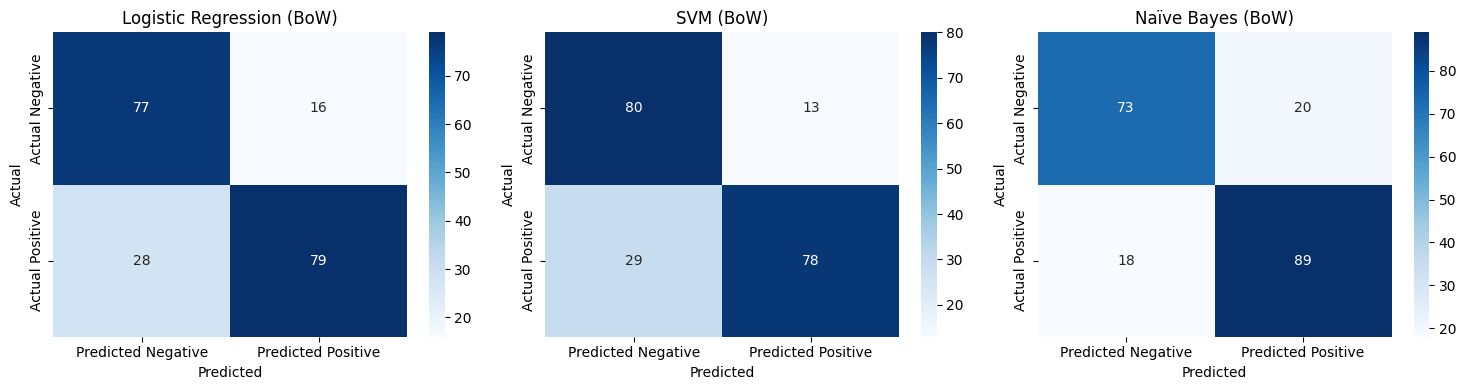

In [ ]:
print("Confusion Matrices for Bag-of-Words Models:")
plot_confusion_matrices(model_names_bow, y_tests_bow, y_preds_bow, '(BoW)')


CM Plot for TF-IDF Models

Confusion Matrices for TF-IDF Models:


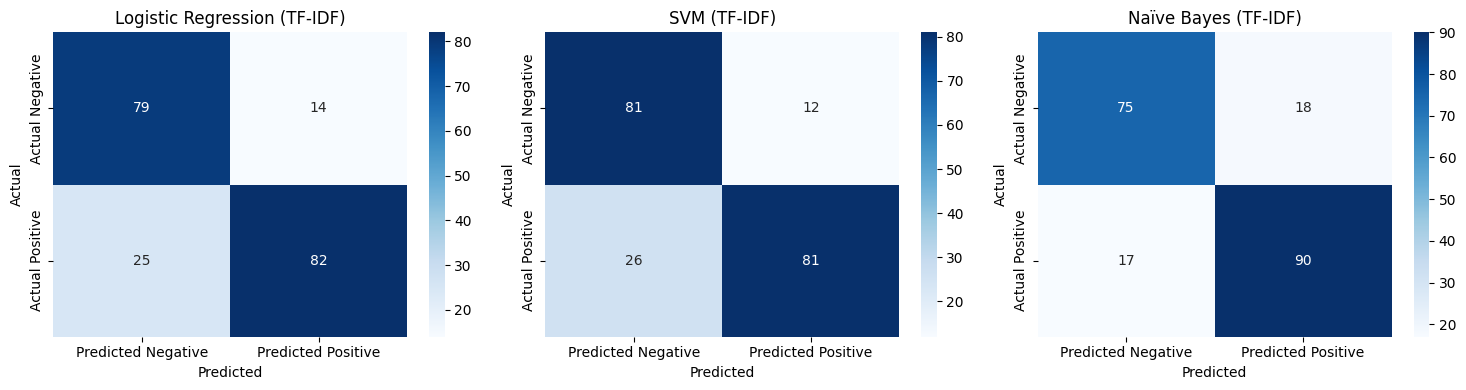

In [ ]:
print("Confusion Matrices for TF-IDF Models:")
plot_confusion_matrices(model_names_tfidf, y_tests_tfidf, y_preds_tfidf, '(TF-IDF)')


Plot Combined ROC Curves

In [ ]:
def plot_roc_curves(model_names, y_tests, y_pred_probas, title_suffix):
    plt.figure(figsize=(8, 6))

    for idx in range(len(model_names)):
        if y_pred_probas[idx] is not None:
            fpr, tpr, thresholds = roc_curve(y_tests[idx], y_pred_probas[idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{model_names[idx]} (AUC = {roc_auc:.2f})')
        else:
            print(f"{model_names[idx]} does not support probability estimates; ROC curve cannot be plotted.")

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves {title_suffix}')
    plt.legend(loc="lower right")
    plt.show()


ROC Plot for Bag-of-Words Models

ROC Curves for Bag-of-Words Models:


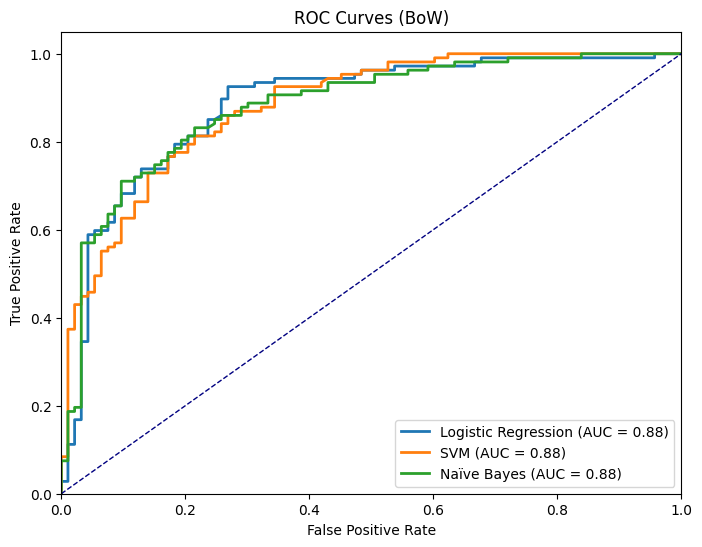

In [ ]:
print("ROC Curves for Bag-of-Words Models:")
plot_roc_curves(model_names_bow, y_tests_bow, y_pred_probas_bow, '(BoW)')


ROC Plot for TF-IDF Models

ROC Curves for TF-IDF Models:


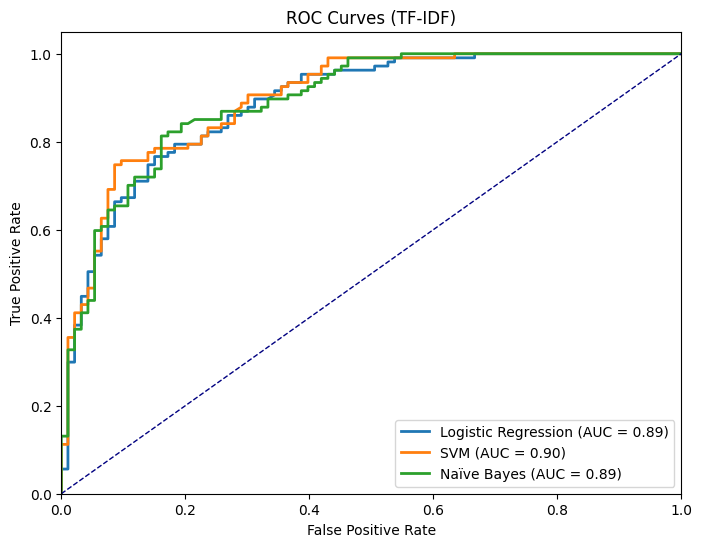

In [ ]:
print("ROC Curves for TF-IDF Models:")
plot_roc_curves(model_names_tfidf, y_tests_tfidf, y_pred_probas_tfidf, '(TF-IDF)')


### Task 3: Classification Using a BERT-Based Model with Fine-Tuning

Split the Data

In [ ]:
# Split into training+validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, stratify=y_temp, test_size=0.25, random_state=42
)


Choose the BERT Model to Fine-Tune

In [ ]:
# Choose a BERT model to fine-tune
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


Build the Classifier Model

In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(
        tfhub_handle_preprocess, name='preprocessing'
    )
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(
        tfhub_handle_encoder, trainable=True, name='BERT_encoder'
    )
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']  # Pooled output from BERT
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(inputs=text_input, outputs=net)

classifier_model = build_classifier_model()


Visualize the Model Architecture

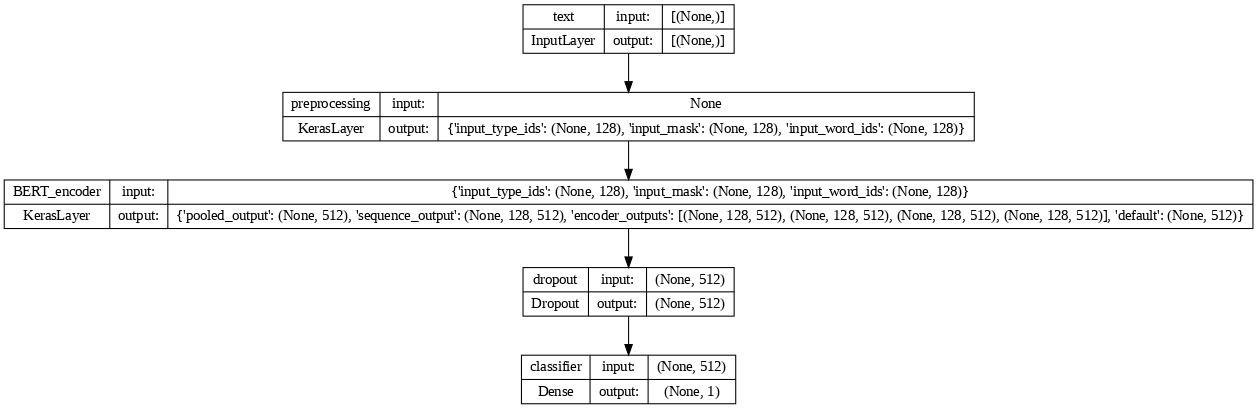

In [ ]:
tf.keras.utils.plot_model(
    classifier_model, show_shapes=True, dpi=76
)


Compile the Model

In [ ]:
# Define the number of epochs and steps
epochs = 10
batch_size = 16
steps_per_epoch = len(X_train) // batch_size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

# Create the optimizer
init_lr = 3e-5
optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw'
)

# Compile the model
classifier_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

classifier_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

Train the Model

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)


Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
38/38 [==============================] - 197s 5s/step - loss: 0.7021 - binary_accuracy: 0.5150 - val_loss: 0.6606 - val_binary_accuracy: 0.5300
Epoch 2/10
38/38 [==============================] - 172s 5s/step - loss: 0.5872 - binary_accuracy: 0.6600 - val_loss: 0.5568 - val_binary_accuracy: 0.6950
Epoch 3/10
38/38 [==============================] - 173s 5s/step - loss: 0.4393 - binary_accuracy: 0.7900 - val_loss: 0.5297 - val_binary_accuracy: 0.7400
Epoch 4/10
38/38 [==============================] - 171s 5s/step - loss: 0.3388 - binary_accuracy: 0.8383 - val_loss: 0.5294 - val_binary_accuracy: 0.7650
Epoch 5/10
38/38 [==============================] - 177s 5s/step - loss: 0.2691 - binary_accuracy: 0.8900 - val_loss: 0.5540 - val_binary_accuracy: 0.7650
Epoch 6/10
38/38 [==============================] - 178s 5s/step - loss: 0.2105 - binary_accuracy: 0.9167 - val_loss: 0.5852 - val_bi

Plot Training History

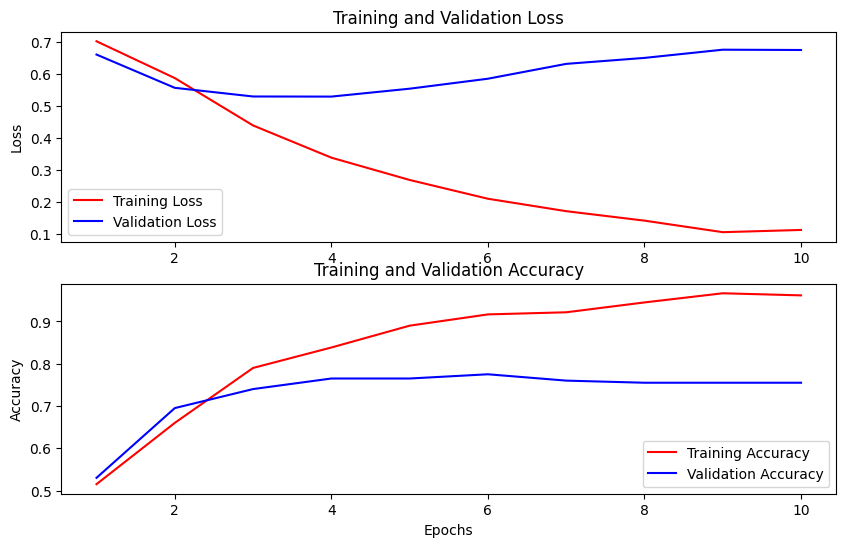

In [ ]:
history_dict = history.history

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_range = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Evaluate the Model

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


7/7 [==============================] - 15s 2s/step - loss: 0.7274 - binary_accuracy: 0.7600
Loss: 0.7274287939071655
Accuracy: 0.7599999904632568


 Make Predictions and Evaluate Performance

7/7 [==============================] - 16s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.78      0.73      0.76       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



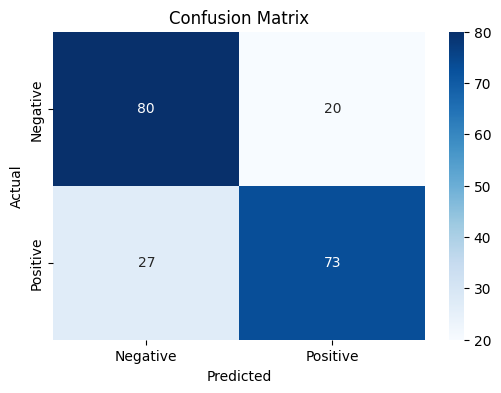

In [ ]:
# Get predicted logits
y_pred_logits = classifier_model.predict(X_test)

# Apply sigmoid to get probabilities
y_pred_probs = tf.nn.sigmoid(y_pred_logits).numpy().flatten()

# Convert probabilities to binary predictions
y_pred = (y_pred_probs >= 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Plot ROC Curve

AUC: 0.8303


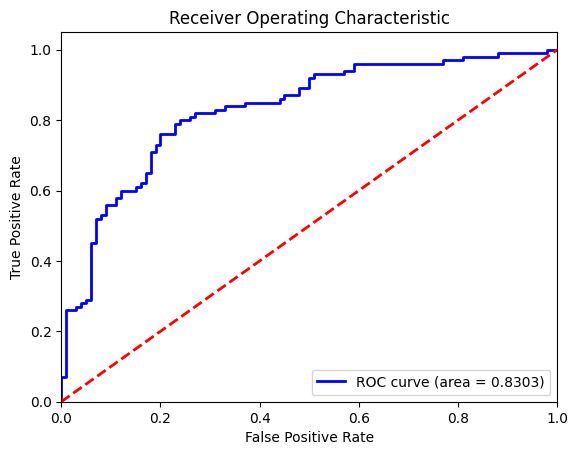

In [ ]:
# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(
    fpr, tpr, color='blue', lw=2,
    label='ROC curve (area = %0.4f)' % roc_auc
)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Task 4: Topic Detection Using LDA and NMF

#### Prepare the Data


For LDA (using CountVectorizer)

In [ ]:
# Count Vectorizer for LDA
count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english'
)
dtm = count_vectorizer.fit_transform(df['review'])


For NMF (using TfidfVectorizer)

In [ ]:
# TF-IDF Vectorizer for NMF
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english'
)
tfidf = tfidf_vectorizer.fit_transform(df['review'])

#### Fit the Models

1. Latent Dirichlet Allocation (LDA)

In [ ]:
# LDA Model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

2. Non-Negative Matrix Factorization (NMF)

In [ ]:
# NMF Model
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf)


NMF(n_components=5, random_state=42)

#### Display Topics

Define a Function to Display Topics

In [ ]:
# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")


Display Topics for LDA

In [ ]:
print("LDA Topics:")
no_top_words = 7
display_topics(lda_model, count_vectorizer.get_feature_names_out(), no_top_words)

LDA Topics:
Topic 1:
good price great really nice used time
Topic 2:
headset quality sound ear bluetooth comfortable poor
Topic 3:
phone battery recommend product buy just life
Topic 4:
great phone works product item bought reception
Topic 5:
phone work use car doesn does like




Display Topics for NMF

In [ ]:

# Display the top words for each topic (NMF)
print("NMF Topics:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)


NMF Topics:
Topic 1:
great price deal item device sound worked
Topic 2:
phone ve best new love battery does
Topic 3:
good quality price sound case audio headset
Topic 4:
works fine battery just comfortable headset plug
Topic 5:
product recommend excellent price don happy buy


